# Project M1 - Cell Type Classification using Neural Network
### The objective of this project is to classify two cell types (spiny/aspiny) according to their electrophysiology features using both logistic regression and neural network.
#### The data set is downloaded from the __[Allen Institute data base](http://alleninstitute.github.io/AllenSDK/_static/examples/nb/cell_types.html#Computing-Electrophysiology-Features)__ and is already saved in the file "ElecPhyFeatures.csv".
#### Two examples for classifying Iris data set using logistic regression and neural network are given in notebooks "logistic-regression-for-iris-classification.ipynb" and "Iris_NeuralNetworkTutorial.ipynb" respectively. You can start with these two examples before you work on the Allen's data set.

## Getting start with the Allen's data set
Use python library Pandas to read the csv file. The data set is now stored in Pandas dataframe.

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("ElecPhyFeatures.csv",index_col=0)
df

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type
0,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391,spiny
1,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595,spiny
2,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321,aspiny
3,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559,aspiny
4,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991,spiny
5,0.004293,27.386857,-55.952496,5.738636e-01,1.096060,7.598187,1.025410,-48.968750,-48.718753,-57.781250,...,1.494850,-49.906254,-50.697918,-73.375004,1.820011,1.816597,1.837732,-88.250000,-73.723457,aspiny
6,0.008404,58.025000,10.910000,2.135016e-01,1.281540,5.215180,1.025916,-49.031254,-49.947918,-52.681252,...,1.479344,-53.406254,-55.041669,-71.950003,3.561528,3.337599,2.545704,-87.968750,-71.233719,aspiny
7,-0.004772,7.692868,-22.384998,1.928487e+00,1.145680,10.018760,1.024100,-65.812508,-57.906254,-66.875003,...,1.314152,-65.937508,-57.984379,-73.656253,1.037036,0.957869,1.208267,-92.187500,-72.735245,aspiny
8,NaN,138.265000,22.563125,5.297619e-02,1.204215,5.688763,1.026005,-48.031250,-47.781251,-51.825002,...,1.519892,-55.312500,-59.458335,-82.500000,4.093781,4.282551,4.176981,-92.531250,-82.483353,spiny
9,0.120058,23.966667,-6.982500,3.839059e-02,1.097380,2.098730,1.024688,-56.500004,-55.484377,-60.837504,...,1.677644,-56.531254,-55.562502,-73.275005,2.660697,2.707389,2.868150,-98.812508,-72.995895,aspiny


Find the features with no missing data. You will choose any combination of features you want (avoid using those 'features' that are actually IDs) as input to the classifier. You will get bonus points if you figure out which features are most useful in distinguishing the cell type.

In [3]:
idx_no_nan = np.nonzero([~np.isnan(df[features].values).any() for features in df.columns[:-1]])[0]
# features that have no missing data which you can choose from
df.columns[idx_no_nan]

Index(['f_i_curve_slope', 'fast_trough_t_long_square',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_short_square', 'has_burst', 'has_delay', 'has_pause',
       'id', 'input_resistance_mohm', 'latency', 'peak_t_long_square',
       'peak_t_short_square', 'peak_v_long_square', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'specimen_id', 'tau', 'threshold_i_long_square',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_short_square', 'threshold_v_long_square',
       'threshold_v_short_square', 'thumbnail_sweep_id',
       'trough_t_long_square', 'trough_t_short_square', 'trough_v_long_square',
       'trough_v_short_square', 'upstroke_downstroke_ratio_long_square',
       'upstroke_downstroke_ratio_short_square', 'vm_for_sag', 'vrest'],
      dtype='object')

The cell type is determined by the dendrite type in the last column of the data set. There is a minority type called "sparsely spiny". You can do either a 3-class classification or a binary classification excluding the "sparsely spiny".

['spiny' 'spiny' 'aspiny' ... 'sparsely spiny' 'spiny' 'aspiny']


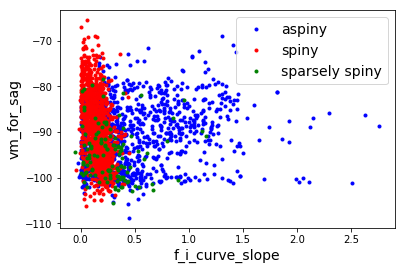

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#upstroke1
sel_feature = ['f_i_curve_slope','vm_for_sag'] # Select features
sel_feature2 = ['f_i_curve_slope','fast_trough_t_long_square']
sel_feature3 = ['f_i_curve_slope','has_burst']
sel_feature4 = ['f_i_curve_slope','has_delay']
sel_feature5 = ['f_i_curve_slope','has_pause']
sel_feature6 = ['f_i_curve_slope','id']
sel_feature7 = ['f_i_curve_slope','peak_t_short_square']
sel_feature8 = ['f_i_curve_slope','peak_t_short_square', 'vm_for_sag', 'has_burst', 'has_delay', 'has_pause', 'id', 'fast_trough_t_long_square']
sel_feature9 = ['f_i_curve_slope','has_delay', 'has_pause', 'id']
X = df[sel_feature].values
X2 = df[sel_feature2].values
X3 = df[sel_feature3].values
X4 = df[sel_feature4].values
X5 = df[sel_feature5].values
X6 = df[sel_feature6].values
X7 = df[sel_feature7].values
X8 = df[sel_feature8].values
X9 = df[sel_feature9].values
Y = df['dendrite_type'].values
y = np.where(Y=='spiny',1,0)
y[np.nonzero(Y=='sparsely spiny')[0]] = 2

print(Y)
plt.figure(1, figsize=(6,4))
plt.plot(X[:,0][y==0], X[:, 1][y==0], "b.", label="aspiny")
plt.plot(X[:,0][y==1], X[:, 1][y==1], "r.", label="spiny")
plt.plot(X[:,0][y==2], X[:, 1][y==2], "g.", label="sparsely spiny")
plt.xlabel(sel_feature[0], fontsize=14)
plt.ylabel(sel_feature[1], fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.show()

Plot classes based on the two features selected. As you can see, the classes are more seperable under the feature "f_i_curve_slope" rather then "Vrest".

### Now you have defined the training data set and the class labels. Next train the logistic regression classifier and the neural network like in the two examples and compare the performance of these two methods.

In [5]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [6]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
ylabel = encoder.transform(['aspiny','spiny','sparsely spiny'])
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
print(dummy_y)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [7]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

def expanded_model(): 
    model = Sequential()
    model.add(Dense(11, input_dim=8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def expanded_model2(): 
    model = Sequential()
    model.add(Dense(6, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [8]:
# This performs poorly 
model = baseline_model();
model.fit(X,dummy_y,epochs=125,verbose=1)
y_pred = model.predict_classes(X)

####################### !!!!!!!!
# This feature selection has some of the best performance of those tested, the feature in question is fast_trough_t_long_square
model2 = baseline_model();
model2.fit(X2,dummy_y,epochs=125,verbose=1)
y_pred2 = model2.predict_classes(X2)

####################### !!!!!!!!
# This feature selection has some of the best performance of those tested, the feature in question is has_burst
model3 = baseline_model();
model3.fit(X3,dummy_y,epochs=125,verbose=1)
y_pred3 = model3.predict_classes(X3)

####################### !!!!!!!!
# This feature selection has some of the best performance of those tested, the feature in question is has_delay
model4 = baseline_model();
model4.fit(X4,dummy_y,epochs=125,verbose=1)
y_pred4 = model4.predict_classes(X4)

# This feature combination performs poorly
model5 = baseline_model();
model5.fit(X5,dummy_y,epochs=125,verbose=1)
y_pred5 = model5.predict_classes(X5)

# This feature combination performs poorly
model6 = baseline_model();
model6.fit(X6,dummy_y,epochs=125,verbose=1)
y_pred6 = model6.predict_classes(X6)

# This feature combination performs poorly 
model7 = baseline_model();
model7.fit(X7,dummy_y,epochs=125,verbose=1)
y_pred7 = model7.predict_classes(X7)

# This feature combination performs poorly 
model8 = expanded_model();
model8.fit(X8,dummy_y,epochs=125,verbose=1)
y_pred8 = model8.predict_classes(X8)

model9 = expanded_model2();
model9.fit(X9,dummy_y,epochs=125,verbose=1)
y_pred9 = model9.predict_classes(X9)


Epoch 1/125
2333/2333 [==============================] - 0s 124us/step - loss: 15.2890 - acc: 0.0514
Epoch 2/125
2333/2333 [==============================] - 0s 37us/step - loss: 15.2890 - acc: 0.0514
Epoch 3/125
2333/2333 [==============================] - 0s 39us/step - loss: 15.2890 - acc: 0.0514
Epoch 4/125
2333/2333 [==============================] - 0s 54us/step - loss: 15.2890 - acc: 0.0514
Epoch 5/125
2333/2333 [==============================] - 0s 44us/step - loss: 15.2890 - acc: 0.0514
Epoch 6/125
2333/2333 [==============================] - 0s 47us/step - loss: 15.2890 - acc: 0.0514
Epoch 7/125
2333/2333 [==============================] - 0s 53us/step - loss: 15.2890 - acc: 0.0514
Epoch 8/125
2333/2333 [==============================] - 0s 43us/step - loss: 15.2890 - acc: 0.0514
Epoch 9/125
2333/2333 [==============================] - 0s 57us/step - loss: 15.2890 - acc: 0.0514
Epoch 10/125
2333/2333 [==============================] - 0s 50us/step - loss: 15.2890 - acc: 0.051

2333/2333 [==============================] - 0s 41us/step - loss: 15.2890 - acc: 0.0514
Epoch 83/125
2333/2333 [==============================] - 0s 46us/step - loss: 15.2890 - acc: 0.0514
Epoch 84/125
2333/2333 [==============================] - 0s 57us/step - loss: 15.2890 - acc: 0.0514
Epoch 85/125
2333/2333 [==============================] - 0s 54us/step - loss: 15.2890 - acc: 0.0514
Epoch 86/125
2333/2333 [==============================] - 0s 60us/step - loss: 15.2890 - acc: 0.0514
Epoch 87/125
2333/2333 [==============================] - 0s 58us/step - loss: 15.2890 - acc: 0.0514
Epoch 88/125
2333/2333 [==============================] - 0s 46us/step - loss: 15.2890 - acc: 0.0514
Epoch 89/125
2333/2333 [==============================] - 0s 39us/step - loss: 15.2890 - acc: 0.0514
Epoch 90/125
2333/2333 [==============================] - 0s 41us/step - loss: 15.2890 - acc: 0.0514
Epoch 91/125
2333/2333 [==============================] - 0s 40us/step - loss: 15.2890 - acc: 0.0514
Epo

2333/2333 [==============================] - 0s 37us/step - loss: 0.6464 - acc: 0.7497
Epoch 39/125
2333/2333 [==============================] - 0s 36us/step - loss: 0.6458 - acc: 0.7518
Epoch 40/125
2333/2333 [==============================] - 0s 35us/step - loss: 0.6456 - acc: 0.7518
Epoch 41/125
2333/2333 [==============================] - 0s 35us/step - loss: 0.6447 - acc: 0.7527
Epoch 42/125
2333/2333 [==============================] - 0s 35us/step - loss: 0.6443 - acc: 0.7518
Epoch 43/125
2333/2333 [==============================] - 0s 35us/step - loss: 0.6445 - acc: 0.7514
Epoch 44/125
2333/2333 [==============================] - 0s 35us/step - loss: 0.6436 - acc: 0.7514
Epoch 45/125
2333/2333 [==============================] - 0s 36us/step - loss: 0.6432 - acc: 0.7514
Epoch 46/125
2333/2333 [==============================] - 0s 35us/step - loss: 0.6425 - acc: 0.7514
Epoch 47/125
2333/2333 [==============================] - 0s 34us/step - loss: 0.6421 - acc: 0.7510
Epoch 48/125


2333/2333 [==============================] - 0s 38us/step - loss: 0.6248 - acc: 0.7523
Epoch 120/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6243 - acc: 0.7523
Epoch 121/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6244 - acc: 0.7527
Epoch 122/125
2333/2333 [==============================] - 0s 36us/step - loss: 0.6243 - acc: 0.7535
Epoch 123/125
2333/2333 [==============================] - 0s 37us/step - loss: 0.6240 - acc: 0.7523
Epoch 124/125
2333/2333 [==============================] - 0s 36us/step - loss: 0.6239 - acc: 0.7531
Epoch 125/125
2333/2333 [==============================] - 0s 36us/step - loss: 0.6236 - acc: 0.7527
Epoch 1/125
2333/2333 [==============================] - 0s 135us/step - loss: 1.0742 - acc: 0.3502
Epoch 2/125
2333/2333 [==============================] - 0s 50us/step - loss: 0.9948 - acc: 0.6275
Epoch 3/125
2333/2333 [==============================] - 0s 47us/step - loss: 0.8985 - acc: 0.7402
Epoch 4/1

2333/2333 [==============================] - 0s 39us/step - loss: 0.6212 - acc: 0.7544
Epoch 77/125
2333/2333 [==============================] - 0s 49us/step - loss: 0.6207 - acc: 0.7544
Epoch 78/125
2333/2333 [==============================] - 0s 40us/step - loss: 0.6205 - acc: 0.7540
Epoch 79/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6204 - acc: 0.7561
Epoch 80/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6206 - acc: 0.7540
Epoch 81/125
2333/2333 [==============================] - 0s 39us/step - loss: 0.6205 - acc: 0.7544
Epoch 82/125
2333/2333 [==============================] - 0s 40us/step - loss: 0.6202 - acc: 0.7561
Epoch 83/125
2333/2333 [==============================] - 0s 41us/step - loss: 0.6203 - acc: 0.7557
Epoch 84/125
2333/2333 [==============================] - 0s 40us/step - loss: 0.6201 - acc: 0.7557
Epoch 85/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6203 - acc: 0.7540
Epoch 86/125


2333/2333 [==============================] - 0s 38us/step - loss: 0.6283 - acc: 0.7548
Epoch 33/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6276 - acc: 0.7548
Epoch 34/125
2333/2333 [==============================] - 0s 39us/step - loss: 0.6266 - acc: 0.7557
Epoch 35/125
2333/2333 [==============================] - 0s 39us/step - loss: 0.6260 - acc: 0.7565
Epoch 36/125
2333/2333 [==============================] - 0s 39us/step - loss: 0.6259 - acc: 0.7535
Epoch 37/125
2333/2333 [==============================] - 0s 40us/step - loss: 0.6253 - acc: 0.7570
Epoch 38/125
2333/2333 [==============================] - 0s 43us/step - loss: 0.6248 - acc: 0.7553
Epoch 39/125
2333/2333 [==============================] - 0s 39us/step - loss: 0.6246 - acc: 0.7561
Epoch 40/125
2333/2333 [==============================] - 0s 40us/step - loss: 0.6240 - acc: 0.7557
Epoch 41/125
2333/2333 [==============================] - 0s 40us/step - loss: 0.6236 - acc: 0.7548
Epoch 42/125


2333/2333 [==============================] - 0s 44us/step - loss: 0.6175 - acc: 0.7531
Epoch 114/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6176 - acc: 0.7557
Epoch 115/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6176 - acc: 0.7557
Epoch 116/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6174 - acc: 0.7544
Epoch 117/125
2333/2333 [==============================] - 0s 37us/step - loss: 0.6175 - acc: 0.7548
Epoch 118/125
2333/2333 [==============================] - 0s 39us/step - loss: 0.6172 - acc: 0.7561
Epoch 119/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6174 - acc: 0.7544
Epoch 120/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6172 - acc: 0.7548
Epoch 121/125
2333/2333 [==============================] - 0s 39us/step - loss: 0.6172 - acc: 0.7553
Epoch 122/125
2333/2333 [==============================] - 0s 40us/step - loss: 0.6170 - acc: 0.7557
Epoc

2333/2333 [==============================] - 0s 39us/step - loss: 0.6104 - acc: 0.7540
Epoch 71/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6098 - acc: 0.7561
Epoch 72/125
2333/2333 [==============================] - 0s 37us/step - loss: 0.6094 - acc: 0.7570
Epoch 73/125
2333/2333 [==============================] - 0s 37us/step - loss: 0.6095 - acc: 0.7557
Epoch 74/125
2333/2333 [==============================] - 0s 39us/step - loss: 0.6092 - acc: 0.7570
Epoch 75/125
2333/2333 [==============================] - 0s 48us/step - loss: 0.6089 - acc: 0.7561
Epoch 76/125
2333/2333 [==============================] - 0s 42us/step - loss: 0.6088 - acc: 0.7544
Epoch 77/125
2333/2333 [==============================] - 0s 42us/step - loss: 0.6084 - acc: 0.7561
Epoch 78/125
2333/2333 [==============================] - 0s 43us/step - loss: 0.6083 - acc: 0.7570
Epoch 79/125
2333/2333 [==============================] - 0s 51us/step - loss: 0.6086 - acc: 0.7540
Epoch 80/125


2333/2333 [==============================] - 0s 50us/step - loss: 9.2094 - acc: 0.4286
Epoch 27/125
2333/2333 [==============================] - 0s 43us/step - loss: 9.2094 - acc: 0.4286
Epoch 28/125
2333/2333 [==============================] - 0s 42us/step - loss: 9.2094 - acc: 0.4286
Epoch 29/125
2333/2333 [==============================] - 0s 40us/step - loss: 9.2094 - acc: 0.4286
Epoch 30/125
2333/2333 [==============================] - 0s 36us/step - loss: 9.2094 - acc: 0.4286
Epoch 31/125
2333/2333 [==============================] - 0s 37us/step - loss: 9.2094 - acc: 0.4286
Epoch 32/125
2333/2333 [==============================] - 0s 39us/step - loss: 9.2094 - acc: 0.4286
Epoch 33/125
2333/2333 [==============================] - 0s 41us/step - loss: 9.2094 - acc: 0.4286
Epoch 34/125
2333/2333 [==============================] - 0s 40us/step - loss: 9.2094 - acc: 0.4286
Epoch 35/125
2333/2333 [==============================] - 0s 40us/step - loss: 9.2094 - acc: 0.4286
Epoch 36/125


Epoch 108/125
2333/2333 [==============================] - 0s 38us/step - loss: 9.2094 - acc: 0.4286
Epoch 109/125
2333/2333 [==============================] - 0s 36us/step - loss: 9.2094 - acc: 0.4286
Epoch 110/125
2333/2333 [==============================] - 0s 35us/step - loss: 9.2094 - acc: 0.4286
Epoch 111/125
2333/2333 [==============================] - 0s 37us/step - loss: 9.2094 - acc: 0.4286
Epoch 112/125
2333/2333 [==============================] - 0s 36us/step - loss: 9.2094 - acc: 0.4286
Epoch 113/125
2333/2333 [==============================] - 0s 37us/step - loss: 9.2094 - acc: 0.4286
Epoch 114/125
2333/2333 [==============================] - 0s 41us/step - loss: 9.2094 - acc: 0.4286
Epoch 115/125
2333/2333 [==============================] - 0s 40us/step - loss: 9.2094 - acc: 0.4286
Epoch 116/125
2333/2333 [==============================] - 0s 39us/step - loss: 9.2094 - acc: 0.4286
Epoch 117/125
2333/2333 [==============================] - 0s 39us/step - loss: 9.2094 - ac

2333/2333 [==============================] - 0s 43us/step - loss: 0.6337 - acc: 0.7548
Epoch 65/125
2333/2333 [==============================] - 0s 50us/step - loss: 0.6331 - acc: 0.7540
Epoch 66/125
2333/2333 [==============================] - 0s 43us/step - loss: 0.6329 - acc: 0.7561
Epoch 67/125
2333/2333 [==============================] - 0s 43us/step - loss: 0.6321 - acc: 0.7535
Epoch 68/125
2333/2333 [==============================] - 0s 40us/step - loss: 0.6318 - acc: 0.7578
Epoch 69/125
2333/2333 [==============================] - 0s 37us/step - loss: 0.6315 - acc: 0.7540
Epoch 70/125
2333/2333 [==============================] - 0s 36us/step - loss: 0.6309 - acc: 0.7544
Epoch 71/125
2333/2333 [==============================] - 0s 38us/step - loss: 0.6306 - acc: 0.7583
Epoch 72/125
2333/2333 [==============================] - 0s 40us/step - loss: 0.6303 - acc: 0.7548
Epoch 73/125
2333/2333 [==============================] - 0s 41us/step - loss: 0.6306 - acc: 0.7565
Epoch 74/125


2333/2333 [==============================] - 0s 41us/step - loss: 15.2890 - acc: 0.0514
Epoch 21/125
2333/2333 [==============================] - 0s 47us/step - loss: 15.2890 - acc: 0.0514
Epoch 22/125
2333/2333 [==============================] - 0s 52us/step - loss: 15.2890 - acc: 0.0514
Epoch 23/125
2333/2333 [==============================] - 0s 44us/step - loss: 15.2890 - acc: 0.0514
Epoch 24/125
2333/2333 [==============================] - 0s 44us/step - loss: 15.2890 - acc: 0.0514
Epoch 25/125
2333/2333 [==============================] - 0s 43us/step - loss: 15.2890 - acc: 0.0514
Epoch 26/125
2333/2333 [==============================] - 0s 43us/step - loss: 15.2890 - acc: 0.0514
Epoch 27/125
2333/2333 [==============================] - 0s 42us/step - loss: 15.2890 - acc: 0.0514
Epoch 28/125
2333/2333 [==============================] - 0s 40us/step - loss: 15.2890 - acc: 0.0514
Epoch 29/125
2333/2333 [==============================] - 0s 41us/step - loss: 15.2890 - acc: 0.0514
Epo

2333/2333 [==============================] - 0s 48us/step - loss: 15.2890 - acc: 0.0514
Epoch 102/125
2333/2333 [==============================] - 0s 49us/step - loss: 15.2890 - acc: 0.0514
Epoch 103/125
2333/2333 [==============================] - 0s 52us/step - loss: 15.2890 - acc: 0.0514
Epoch 104/125
2333/2333 [==============================] - 0s 44us/step - loss: 15.2890 - acc: 0.0514
Epoch 105/125
2333/2333 [==============================] - 0s 58us/step - loss: 15.2890 - acc: 0.0514
Epoch 106/125
2333/2333 [==============================] - 0s 48us/step - loss: 15.2890 - acc: 0.0514
Epoch 107/125
2333/2333 [==============================] - 0s 47us/step - loss: 15.2890 - acc: 0.0514
Epoch 108/125
2333/2333 [==============================] - 0s 44us/step - loss: 15.2890 - acc: 0.0514
Epoch 109/125
2333/2333 [==============================] - 0s 49us/step - loss: 15.2890 - acc: 0.0514
Epoch 110/125
2333/2333 [==============================] - 0s 50us/step - loss: 15.2890 - acc: 0

2333/2333 [==============================] - 0s 41us/step - loss: 9.2094 - acc: 0.4286
Epoch 58/125
2333/2333 [==============================] - 0s 44us/step - loss: 9.2094 - acc: 0.4286
Epoch 59/125
2333/2333 [==============================] - 0s 42us/step - loss: 9.2094 - acc: 0.4286
Epoch 60/125
2333/2333 [==============================] - 0s 41us/step - loss: 9.2094 - acc: 0.4286
Epoch 61/125
2333/2333 [==============================] - 0s 42us/step - loss: 9.2094 - acc: 0.4286
Epoch 62/125
2333/2333 [==============================] - 0s 43us/step - loss: 9.2094 - acc: 0.4286
Epoch 63/125
2333/2333 [==============================] - 0s 41us/step - loss: 9.2094 - acc: 0.4286
Epoch 64/125
2333/2333 [==============================] - 0s 41us/step - loss: 9.2094 - acc: 0.4286
Epoch 65/125
2333/2333 [==============================] - 0s 42us/step - loss: 9.2094 - acc: 0.4286
Epoch 66/125
2333/2333 [==============================] - 0s 50us/step - loss: 9.2094 - acc: 0.4286
Epoch 67/125


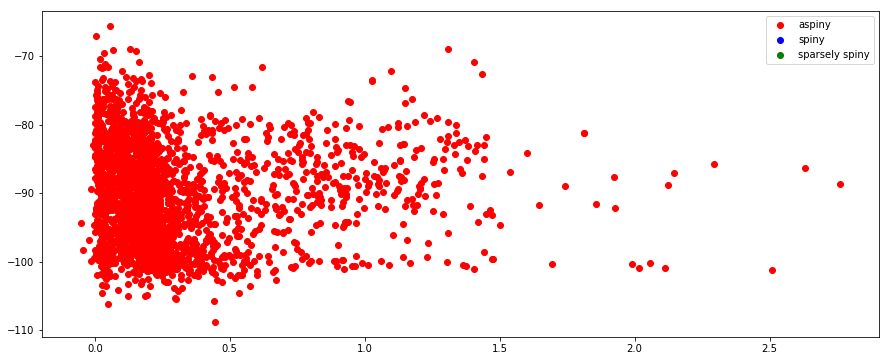

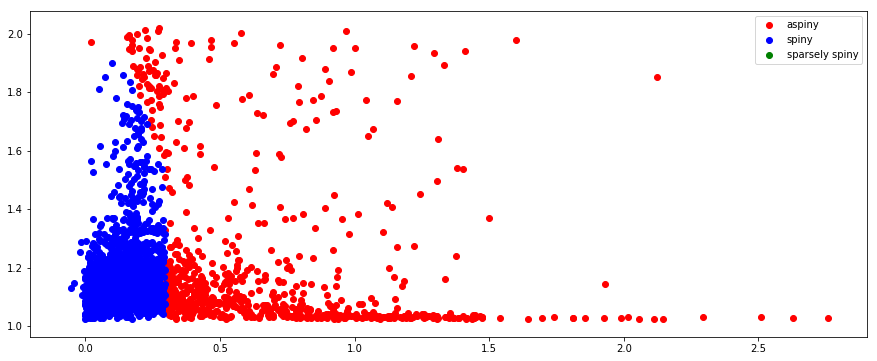

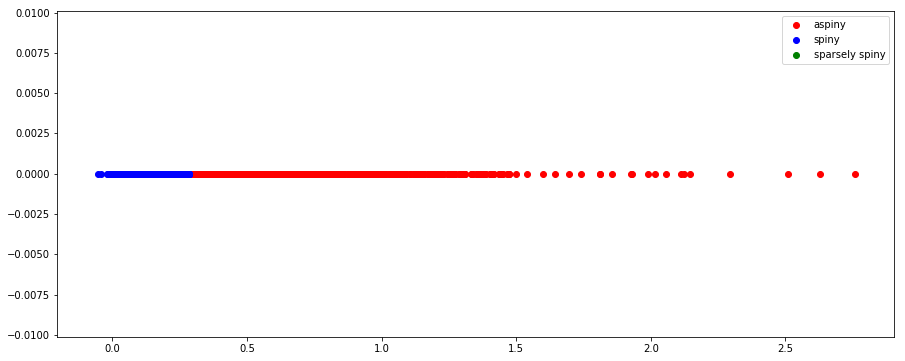

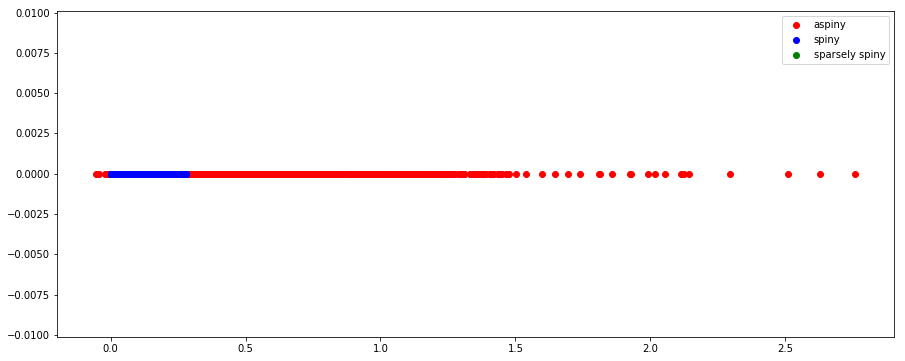

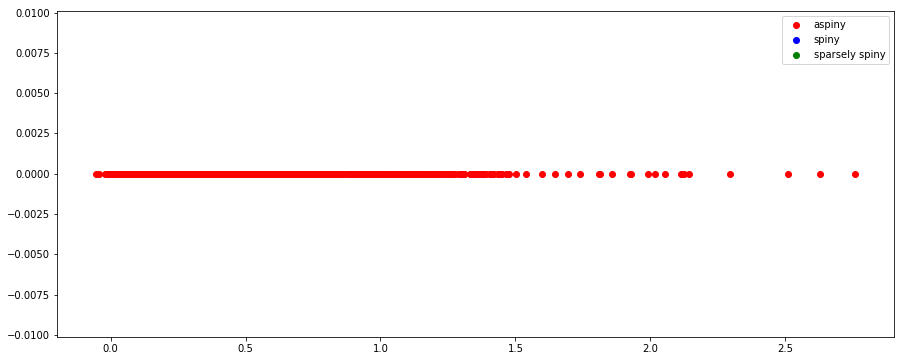

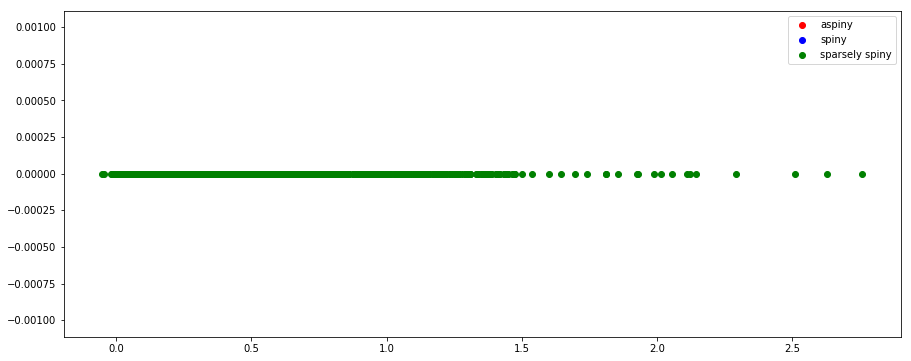

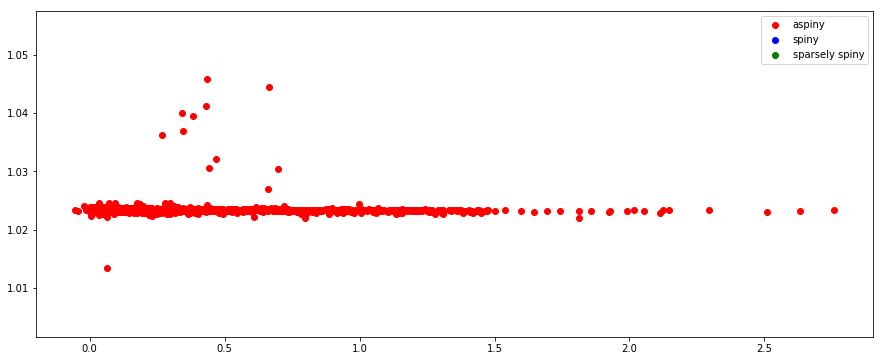

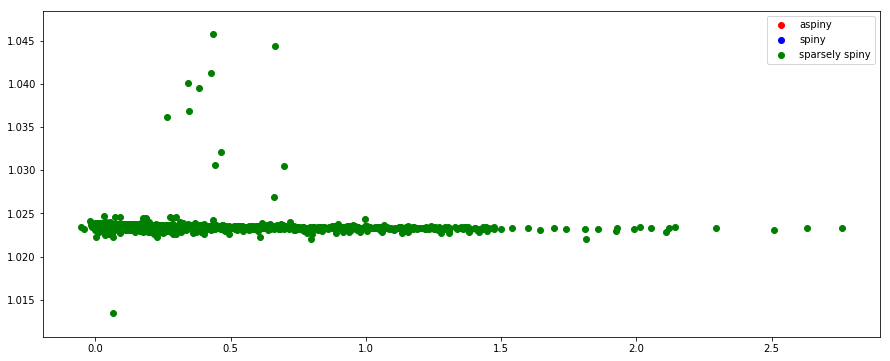

In [43]:
index = [np.nonzero(y_pred==ylabel[0])[0].ravel(),np.nonzero(y_pred==ylabel[1])[0].ravel(),np.nonzero(y_pred==ylabel[2])[0].ravel()]

plt.figure(figsize=(15,6))
plt.scatter(X[index[0],0],X[index[0],1],color='r',label='aspiny')
plt.scatter(X[index[1],0],X[index[1],1],color='b',label ='spiny' )
plt.scatter(X[index[2],0],X[index[2],1],color='g',label = 'sparsely spiny')
plt.legend()

index2 = [np.nonzero(y_pred2==ylabel[0])[0].ravel(),np.nonzero(y_pred2==ylabel[1])[0].ravel(),np.nonzero(y_pred2==ylabel[2])[0].ravel()]

plt.figure(figsize=(15,6))
plt.scatter(X2[index2[0],0],X2[index2[0],1],color='r',label='aspiny')
plt.scatter(X2[index2[1],0],X2[index2[1],1],color='b',label ='spiny' )
plt.scatter(X2[index2[2],0],X2[index2[2],1],color='g',label = 'sparsely spiny')
plt.legend()

index3 = [np.nonzero(y_pred3==ylabel[0])[0].ravel(),np.nonzero(y_pred3==ylabel[1])[0].ravel(),np.nonzero(y_pred3==ylabel[2])[0].ravel()]

plt.figure(figsize=(15,6))
plt.scatter(X3[index3[0],0],X3[index3[0],1],color='r',label='aspiny')
plt.scatter(X3[index3[1],0],X3[index3[1],1],color='b',label ='spiny' )
plt.scatter(X3[index3[2],0],X3[index3[2],1],color='g',label = 'sparsely spiny')
plt.legend()

index4 = [np.nonzero(y_pred4==ylabel[0])[0].ravel(),np.nonzero(y_pred4==ylabel[1])[0].ravel(),np.nonzero(y_pred4==ylabel[2])[0].ravel()]

plt.figure(figsize=(15,6))
plt.scatter(X4[index4[0],0],X4[index4[0],1],color='r',label='aspiny')
plt.scatter(X4[index4[1],0],X4[index4[1],1],color='b',label ='spiny' )
plt.scatter(X4[index4[2],0],X4[index4[2],1],color='g',label = 'sparsely spiny')
plt.legend()

index5 = [np.nonzero(y_pred5==ylabel[0])[0].ravel(),np.nonzero(y_pred5==ylabel[1])[0].ravel(),np.nonzero(y_pred5==ylabel[2])[0].ravel()]

plt.figure(figsize=(15,6))
plt.scatter(X5[index5[0],0],X4[index5[0],1],color='r',label='aspiny')
plt.scatter(X5[index5[1],0],X4[index5[1],1],color='b',label ='spiny' )
plt.scatter(X5[index5[2],0],X4[index5[2],1],color='g',label = 'sparsely spiny')
plt.legend()

index6 = [np.nonzero(y_pred6==ylabel[0])[0].ravel(),np.nonzero(y_pred6==ylabel[1])[0].ravel(),np.nonzero(y_pred6==ylabel[2])[0].ravel()]

plt.figure(figsize=(15,6))
plt.scatter(X6[index6[0],0],X4[index6[0],1],color='r',label='aspiny')
plt.scatter(X6[index6[1],0],X4[index6[1],1],color='b',label ='spiny' )
plt.scatter(X6[index6[2],0],X4[index6[2],1],color='g',label = 'sparsely spiny')
plt.legend()

index7 = [np.nonzero(y_pred7==ylabel[0])[0].ravel(),np.nonzero(y_pred7==ylabel[1])[0].ravel(),np.nonzero(y_pred7==ylabel[2])[0].ravel()]

plt.figure(figsize=(15,6))
plt.scatter(X7[index7[0],0],X7[index7[0],1],color='r',label='aspiny')
plt.scatter(X7[index7[1],0],X4[index7[1],1],color='b',label ='spiny' )
plt.scatter(X7[index7[2],0],X4[index7[2],1],color='g',label = 'sparsely spiny')
plt.legend()

index8 = [np.nonzero(y_pred8==ylabel[0])[0].ravel(),np.nonzero(y_pred8==ylabel[1])[0].ravel(),np.nonzero(y_pred8==ylabel[2])[0].ravel()]

plt.figure(figsize=(15,6))
plt.scatter(X8[index8[0],0],X8[index8[0],1],color='r',label='aspiny')
plt.scatter(X8[index8[1],0],X8[index8[1],1],color='b',label ='spiny' )
plt.scatter(X8[index8[2],0],X8[index8[2],1],color='g',label = 'sparsely spiny')
plt.legend()

index9 = [np.nonzero(y_pred9==ylabel[0])[0].ravel(),np.nonzero(y_pred9==ylabel[1])[0].ravel(),np.nonzero(y_pred9==ylabel[2])[0].ravel()]

plt.figure(figsize=(15,6))
plt.scatter(X9[index9[0],0],X9[index9[0],1],color='r',label='aspiny')
plt.scatter(X9[index9[1],0],X9[index9[1],1],color='b',label ='spiny' )
plt.scatter(X9[index9[2],0],X9[index9[2],1],color='g',label = 'sparsely spiny')
plt.legend()

plt.show()

## Logistic Regression

In [44]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=5)
softmax_reg.fit(X,y)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

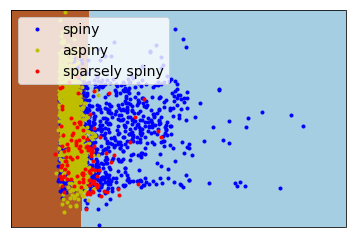

In [46]:
plt.figure(1, figsize=(6,4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.figure(1, figsize=(4, 3))
#plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label="spiny")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "y.", label="aspiny")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "r.", label="sparsely spiny")
plt.legend(loc="upper left", fontsize=14)

plt.show()